In [94]:
# Housing Project

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import cross_val_score,GridSearchCV
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


df=pd.read_csv(r'C:\ProgramData\train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [72]:
df.shape

(1168, 81)

In [3]:
# Exploratory Data Analysis
# Important Observations :
# The dataset comprises of 1168 rows and 81 columns.


In [73]:
# Exploratory Data Analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [5]:
# Above data shows there are 1168 rows and 81 columns ,all columns mostly of integer ,object type with few of float type

In [6]:
# Statistical summary
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [74]:
# checking for null values in dataset

df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [95]:
# Filling null values for categorical features with mode and numerical features with mean

df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace=True)
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0], inplace=True)
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0], inplace=True)

df['BsmtCond'].fillna(df['BsmtCond'].mode()[0], inplace=True)

df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0], inplace=True)

df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0], inplace=True)

df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0], inplace=True)

df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0], inplace=True)

df['GarageType'].fillna(df['GarageType'].mode()[0], inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(), inplace=True)
df['GarageFinish'].fillna(df['GarageFinish'].mode()[0], inplace=True)

df['GarageQual'].fillna(df['GarageQual'].mode()[0], inplace=True)
df['GarageCond'].fillna(df['GarageCond'].mode()[0], inplace=True)

df['Fence'].fillna(df['Fence'].mode()[0], inplace=True)




In [76]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    1168 non-null   float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [96]:
# Now we can drop features like PoolQC,MiscFeature,Alley as values are very less for them

df.drop(['PoolQC','MiscFeature','Alley'],axis=1,inplace=True)

In [12]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,70.98847,4928,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,MnPrv,0,2,2007,WD,Normal,128000
1,889,20,RL,95.00000,15865,Pave,IR1,Lvl,AllPub,Inside,...,0,224,0,MnPrv,0,10,2007,WD,Normal,268000
2,793,60,RL,92.00000,9920,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,MnPrv,0,6,2007,WD,Normal,269790
3,110,20,RL,105.00000,11751,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,MnPrv,0,1,2010,COD,Normal,190000
4,422,20,RL,70.98847,16635,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,MnPrv,0,6,2009,WD,Normal,215000


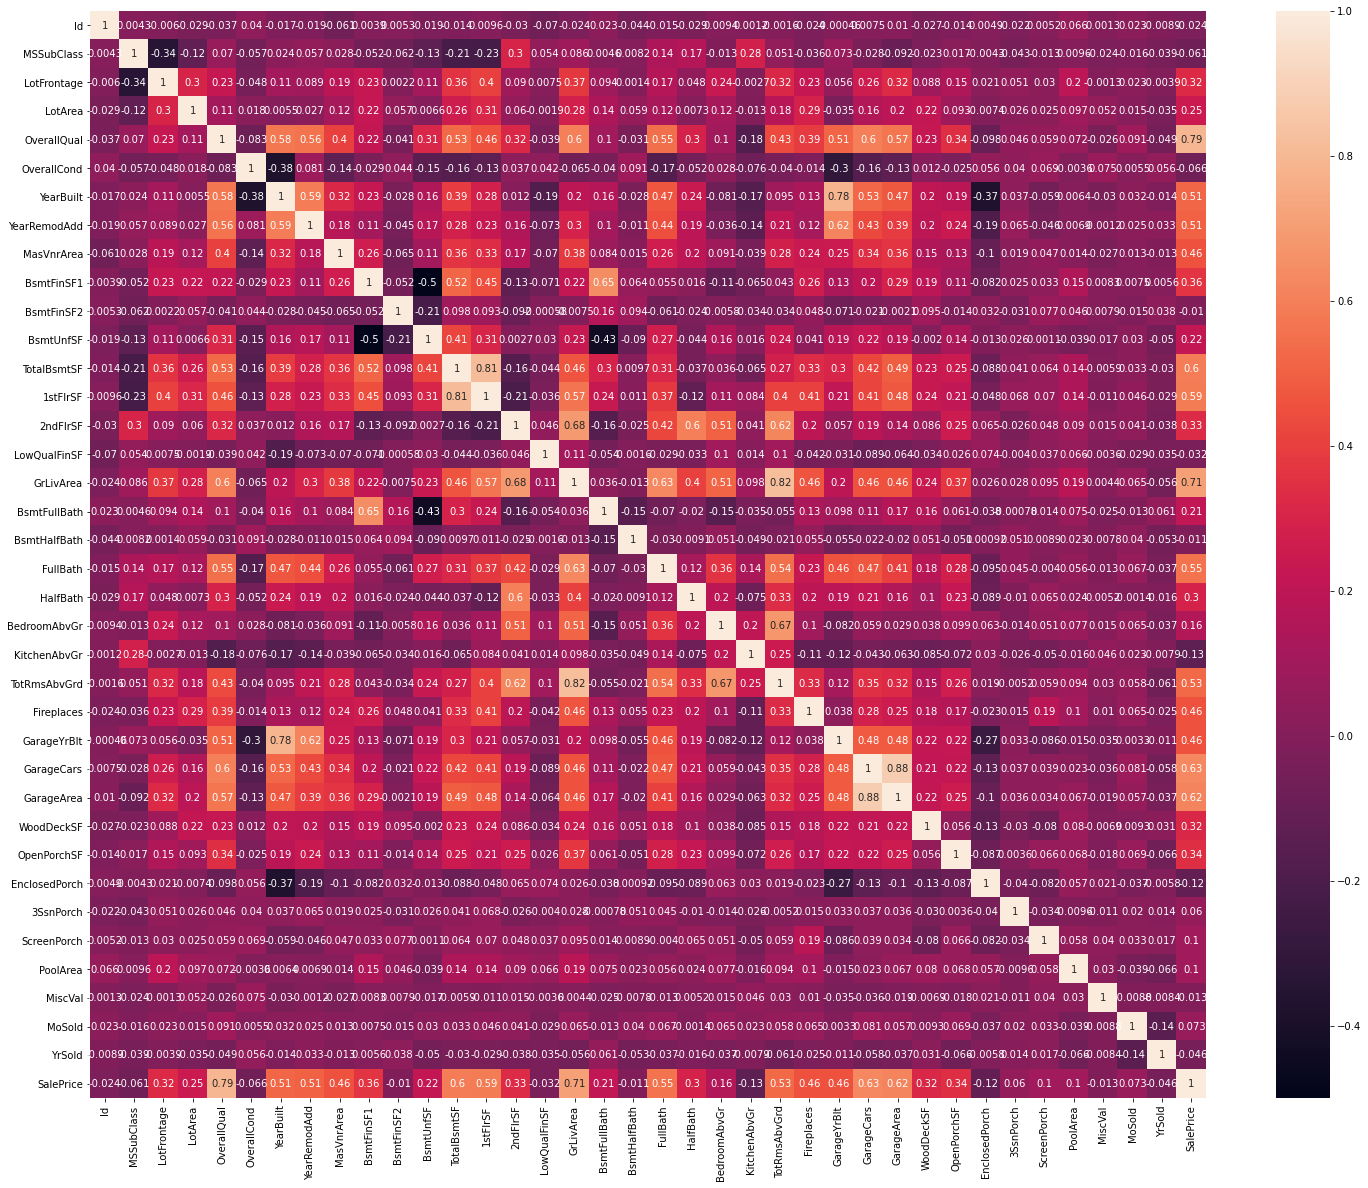

In [89]:
# checking correlation of independent variables with 'SalePrice' variable

plt.figure(figsize=(25,20))
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [90]:
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
1stFlrSF         0.587642
FullBath         0.554988
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
MasVnrArea       0.460535
Fireplaces       0.459611
GarageYrBlt      0.458007
BsmtFinSF1       0.362874
OpenPorchSF      0.339500
2ndFlrSF         0.330386
LotFrontage      0.323779
WoodDeckSF       0.315444
HalfBath         0.295592
LotArea          0.249499
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
BedroomAbvGr     0.158281
PoolArea         0.103280
ScreenPorch      0.100284
MoSold           0.072764
3SsnPorch        0.060119
BsmtFinSF2      -0.010151
BsmtHalfBath    -0.011109
MiscVal         -0.013071
Id              -0.023897
LowQualFinSF    -0.032381
YrSold          -0.045508
MSSubClass      -0.060775
OverallCond     -0.065642
EnclosedPorch   -0.115004
KitchenAbvGr    -0.132108
Name: SalePr

In [ ]:
# Clearly from above correlation matrix and data , 'SalePrice' has positive correlation maximum with OverallQual,GarageCars,
# GrLivArea,GarageArea and negatively correlated with OverallCond ,EnclosedPorch,KitchenAbvGr    

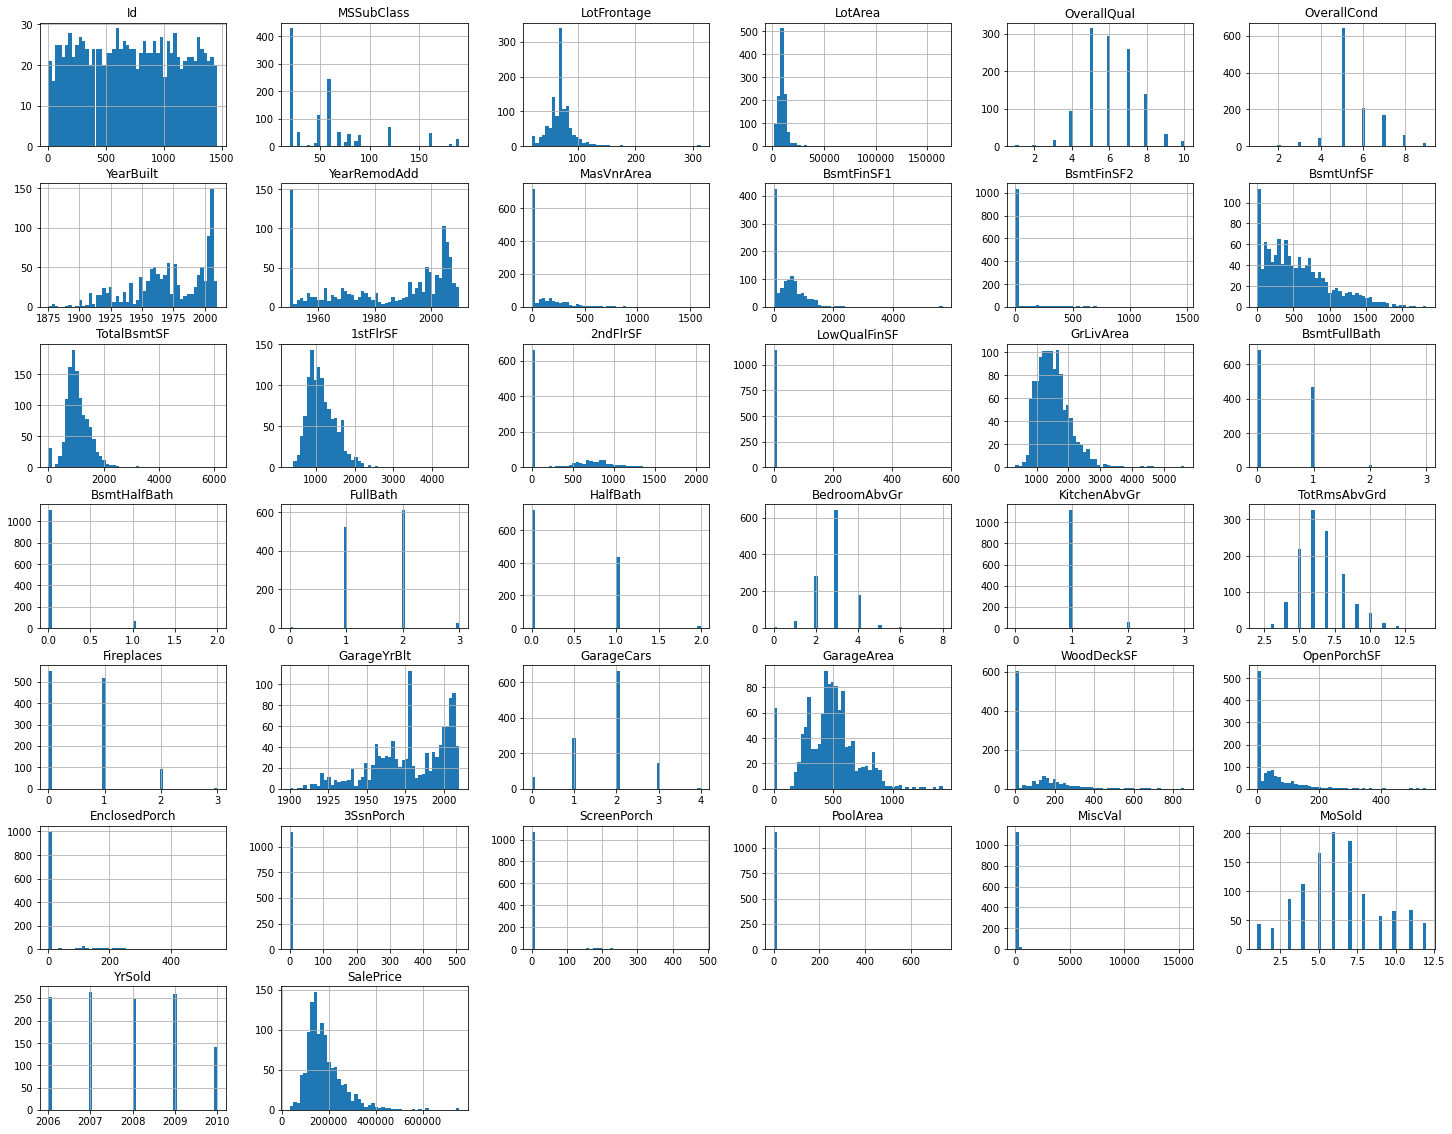

In [85]:
# Lets look at the distribution of all the numeric variables
%matplotlib inline

df.hist(bins=50, figsize=(25,20))
plt.show()

In [ ]:
# Clearly outliers are visible in many features.We will check them later

<AxesSubplot:xlabel='YearBuilt', ylabel='Density'>

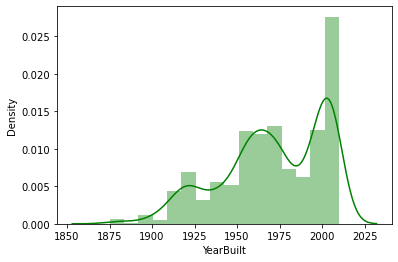

In [86]:
# checking distibution of YearBuilt feature

sns.distplot(df['YearBuilt'], color = 'green')

In [ ]:
# Clearly majority of houses are built in between 1950-2010 period and it is rightly skewed

<AxesSubplot:xlabel='GarageCars', ylabel='Density'>

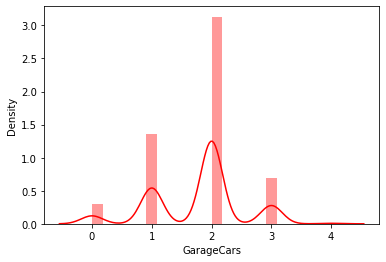

In [91]:
# checking distibution of GarageCars feature

sns.distplot(df['GarageCars'], color = 'red')

In [ ]:
# Clearly maximum houses with cars capacity in garage are 2

<AxesSubplot:xlabel='OverallQual', ylabel='Density'>

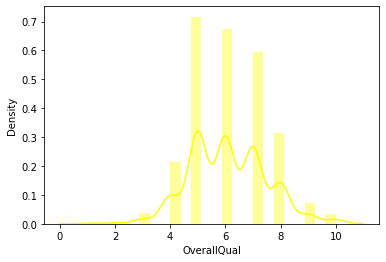

In [92]:
# checking distibution of OverallQual feature

sns.distplot(df['OverallQual'], color = 'yellow')

In [ ]:
# Clearly majority of the houses belong to rating between 4 to 8 in overall quality category

<AxesSubplot:xlabel='GarageArea', ylabel='Density'>

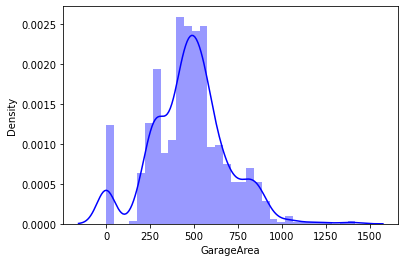

In [88]:
# checking distibution of 'GarageArea feature

sns.distplot(df['GarageArea'], color = 'blue')

<function matplotlib.pyplot.show(close=None, block=None)>

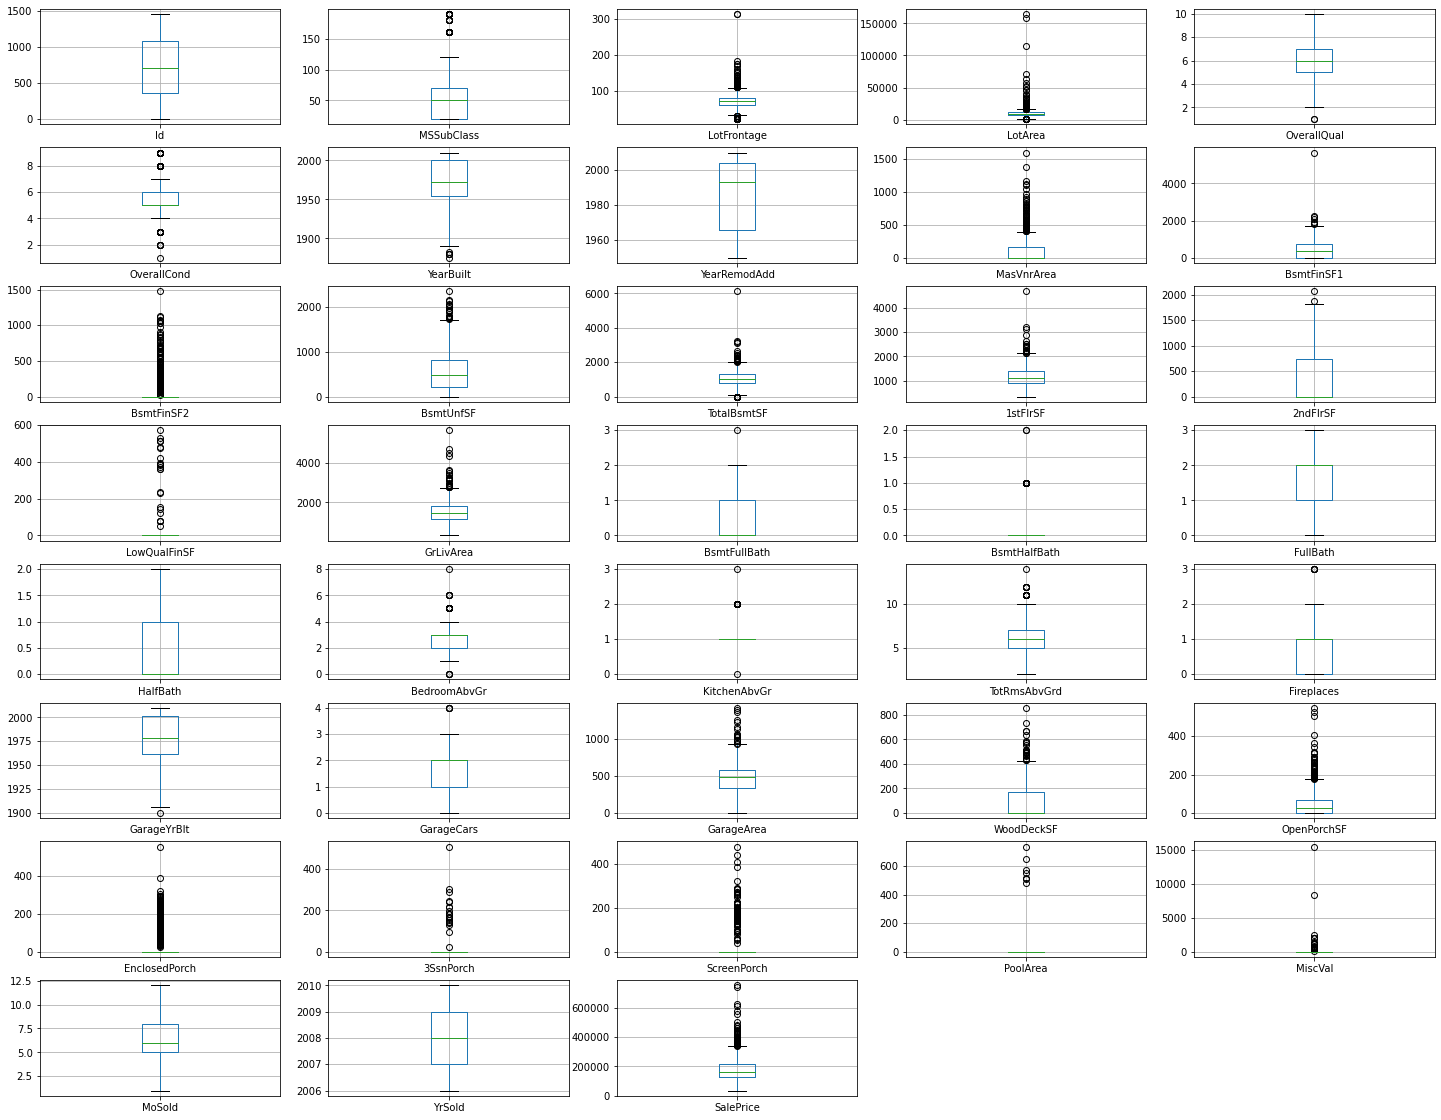

In [99]:
# Checking outliers in data


df.plot(kind='box', subplots=True, layout=(8,5), figsize=(25,20), grid=True)
plt.show

In [ ]:
# Clearly there are many outliers present in different features in dataset

In [13]:
# converting categorical features into ordinal

df_cat = df.select_dtypes(include=['object'])

le= LabelEncoder()
for i in df_cat:   
    df[i] = le.fit_transform(df[i]) 

In [14]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,3,70.98847,4928,1,0,3,0,4,...,0,0,0,2,0,2,2007,8,4,128000
1,889,20,3,95.00000,15865,1,0,3,0,4,...,0,224,0,2,0,10,2007,8,4,268000
2,793,60,3,92.00000,9920,1,0,3,0,1,...,0,0,0,2,0,6,2007,8,4,269790
3,110,20,3,105.00000,11751,1,0,3,0,4,...,0,0,0,2,0,1,2010,0,4,190000
4,422,20,3,70.98847,16635,1,0,3,0,2,...,0,0,0,2,0,6,2009,8,4,215000


In [15]:
# Clearly all the features have been converted to numeric type

In [16]:
# Splitting dataset into X and Y

X=df.drop('SalePrice',axis=1)
y=df.SalePrice

In [17]:

# Scaling the dataset and normalizing feature variables

from sklearn.preprocessing import StandardScaler 

scale = StandardScaler()
X_features=X
X= scale.fit_transform(X)

In [18]:
# Applying PCA for dimensionality reduction

from sklearn.decomposition import PCA

pca = PCA(n_components=25)
X = pd.DataFrame(pca.fit_transform(X))

In [19]:
X

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.457852,-1.573640,-1.508481,-0.857558,0.801029,-0.643369,0.617475,0.425008,0.618745,-1.260043,...,0.084608,0.290213,2.353624,0.223241,0.435843,0.426239,-0.891174,-0.033751,-1.068644,0.696536
1,3.072635,0.562558,5.303940,1.332167,-1.107372,2.124684,0.657303,4.280429,2.021989,-0.802168,...,-1.700398,2.048792,0.792103,1.511907,2.688007,-0.695766,0.919005,0.152516,0.368772,-3.517841
2,2.857988,0.166326,0.534192,-2.211493,-0.340749,0.585968,0.757025,-1.074703,-0.639189,0.870930,...,-0.909420,0.511605,0.853719,0.213086,-0.010583,-0.984695,-0.687728,-0.223627,-0.362654,-0.471629
3,2.148060,-0.186683,2.021481,1.643353,0.172420,-3.439707,0.119261,-0.283900,-0.813383,-0.743602,...,0.972065,-1.587137,1.384267,-0.993977,-0.098986,1.493523,-0.568110,-0.968895,1.625866,-0.687864
4,1.857065,-1.294580,2.462160,-0.214826,0.237068,-0.937893,-0.135455,-0.411928,1.620902,0.346374,...,-1.282729,-0.918460,0.729323,1.950032,-0.082896,-0.857990,-1.064782,-1.469270,0.799288,2.248415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,-3.465990,-1.425235,0.226296,-0.036099,-0.624215,-1.523096,-0.104807,-0.652406,-0.326825,0.832079,...,0.893325,-1.126163,1.406458,0.866129,0.456893,-0.353216,0.445730,0.670060,0.550723,-0.358757
1164,-1.982836,-0.097123,-2.449849,1.455933,-1.289652,1.234918,-0.085936,-0.052495,-0.851032,0.329068,...,0.482758,0.471661,0.280112,0.235106,0.510344,0.098650,-0.279776,-0.476315,-0.010440,-0.048646
1165,-0.881741,-0.344915,-1.318784,-4.167135,1.396366,-0.648457,-0.079608,-0.177444,0.853891,-0.854858,...,0.158765,-0.956368,1.454918,0.175837,-0.031277,-0.053579,-0.063475,-0.474741,-0.446844,0.494085
1166,-6.279837,3.462296,-0.388086,-0.031138,3.110392,0.542405,-0.766540,-0.472176,-0.025669,3.521666,...,0.108368,0.237293,1.319464,-2.122853,1.792912,-2.208634,-0.718982,-0.739705,-0.060575,0.015115


In [21]:
# Checking skewness in features

X.skew().sort_values()

3    -0.072931
13   -0.031502
14    0.038063
19    0.070232
9     0.117535
10    0.185770
21    0.208692
15    0.299205
8     0.345126
23    0.399811
5     0.433153
0     0.466926
12    0.584978
2     0.604561
17    0.664396
1     0.704573
18    0.763981
22    0.771283
24    0.898323
6     0.921789
4     1.064561
11    1.122206
7     1.935207
20    2.138213
16    2.264157
dtype: float64

In [22]:
# Removing skewness

from sklearn.preprocessing import power_transform
z = power_transform(X[0:])
data_new= pd.DataFrame(z,columns=X.columns)
X = data_new


In [23]:
# Checking skewness in features

X.skew().sort_values()

11   -0.311276
7    -0.249197
24   -0.159901
20   -0.155492
18   -0.114567
22   -0.102067
21   -0.074959
8    -0.071144
16   -0.066046
14   -0.040894
1    -0.006777
3     0.009046
23    0.015258
9     0.027642
5     0.027878
17    0.028487
13    0.031039
6     0.033264
15    0.035356
4     0.036745
10    0.058615
0     0.076196
12    0.083643
2     0.102262
19    0.131411
dtype: float64

In [24]:
# Evaluation of models

#Training model with LinearRegression and finding the best state,r2_score

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

model_lr = LinearRegression()

score_s=0
state=0
for i in range(0,25):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =i)
    model_lr.fit(X_train, y_train)
    y_pred_lr = model_lr.predict(X_test)
    score=r2_score(y_test,y_pred_lr)
    if score>score_s:
        score_s=score
        state=i
        
print('best random_state : ',state)
print('best r2 score : ',score_s)

best random_state :  24
best r2 score :  0.8356931962190143


In [25]:
# finding mean_squared_error,rmse  for LinearRegression

mse=mean_squared_error(y_test,y_pred_lr)
rmse=np.sqrt(mse)

rmse

30812.38577862211

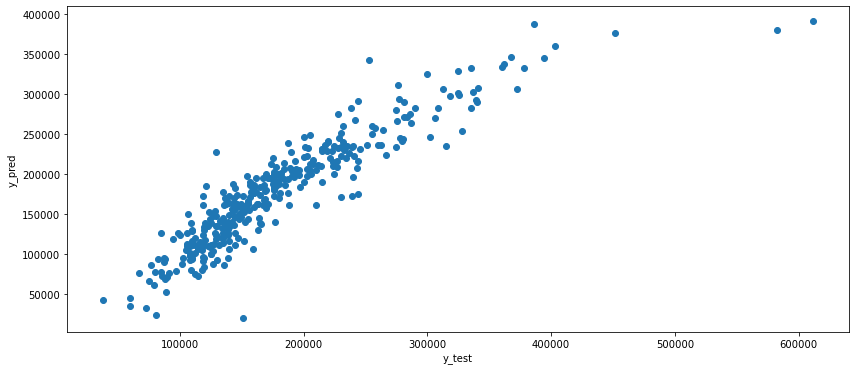

In [26]:
# # plotting original training data wth predicted values for LinearRegression model

plt.figure(figsize=(14,6))
plt.scatter(x=y_test,y=y_pred_lr)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [27]:
# Evaluation of models

#Training model with Ridge (L REGULARIZATION )and finding the best state,r2_score


from sklearn.linear_model import Ridge

model_r=Ridge(alpha=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =12)
model_r.fit(X_train, y_train)
y_pred_r = model_lr.predict(X_test)
score=r2_score(y_test,y_pred_r)

In [28]:
print("R2 score for Ridge = " , score)

R2 score for Ridge =  0.7600311579400052


In [29]:
# finding mean_squared_error,rmse  for Ridge (L2 regularization)

mse=mean_squared_error(y_test,y_pred_r)
rmse=np.sqrt(mse)

rmse

42816.28765342523

In [30]:
# Evaluation of models

#Training model with RandomForestRegressor and finding the best state,r2_score

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

model_rfr = RandomForestRegressor()

score_s=0
state=0
for i in range(0,25):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =i)
    model_rfr.fit(X_train, y_train)
    y_pred_rfr = model_rfr.predict(X_test)
    score=r2_score(y_test,y_pred_rfr)
    if score>score_s:
        score_s=score
        state=i
        
print('best random_state : ',state)
print('best r2 score : ',score_s)

best random_state :  24
best r2 score :  0.8783658218810384


In [31]:
# finding mean_squared_error,rmse  for RandomForestRegressor

mse=mean_squared_error(y_test,y_pred_rfr)
rmse=np.sqrt(mse)

rmse

26510.954565659984

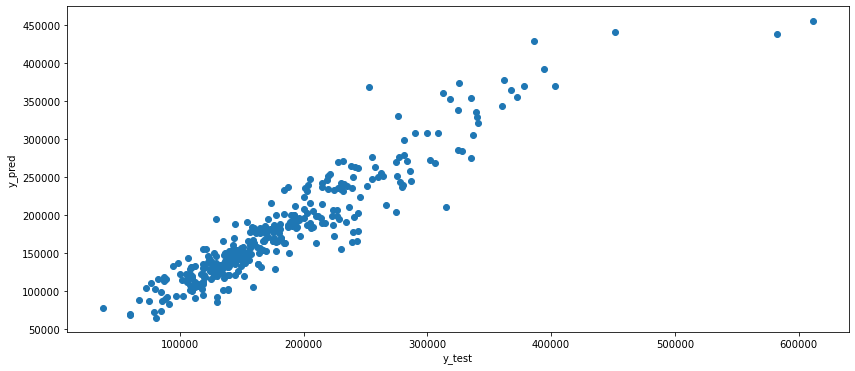

In [32]:
# # plotting original training data wth predicted values for RandomForestRegressor model

plt.figure(figsize=(14,6))
plt.scatter(x=y_test,y=y_pred_rfr)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [33]:
# Evaluation of models

#Training model with KNeighborsRegressor and finding the best state,r2_score

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

model_knr = KNeighborsRegressor()

score_s=0
state=0
for i in range(0,25):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =i)
    model_knr.fit(X_train, y_train)
    y_pred_knr = model_knr.predict(X_test)
    score=r2_score(y_test,y_pred_knr)
    if score>score_s:
        score_s=score
        state=i
        
print('best random_state : ',state)
print('best r2 score : ',score_s)

best random_state :  6
best r2 score :  0.6904656665648351


In [34]:
# finding mean_squared_error,rmse  for KNeighborsRegressor

mse=mean_squared_error(y_test,y_pred_knr)
rmse=np.sqrt(mse)

rmse

43066.88369178601

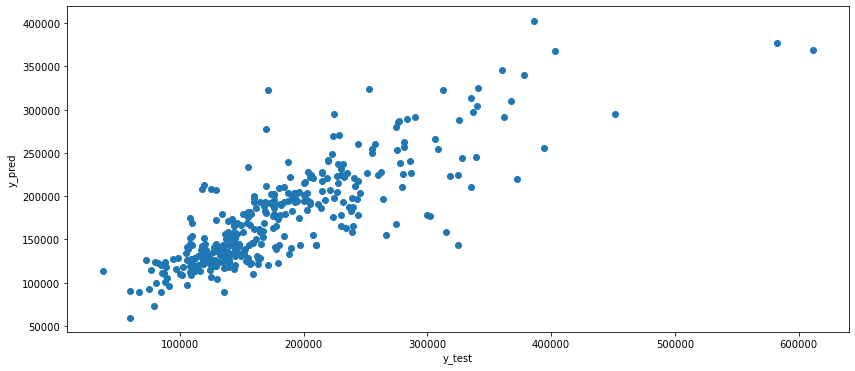

In [35]:
# # plotting original training data wth predicted values for KNeighborsRegressor model

plt.figure(figsize=(14,6))
plt.scatter(x=y_test,y=y_pred_knr)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [36]:
# Evaluation of models

#Training model with DecisionTreeRegressor and finding the best state,r2_score

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

model_dt = DecisionTreeRegressor()

score_s=0
state=0
for i in range(0,25):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =i)
    model_dt.fit(X_train, y_train)
    y_pred_dt = model_dt.predict(X_test)
    score=r2_score(y_test,y_pred_dt)
    if score>score_s:
        score_s=score
        state=i
        
print('best random_state : ',state)
print('best r2 score : ',score_s)

best random_state :  8
best r2 score :  0.7764959771479828


In [37]:
# finding mean_squared_error,rmse  for DecisionTreeRegressor

mse=mean_squared_error(y_test,y_pred_dt)
rmse=np.sqrt(mse)

rmse

39917.093547420314

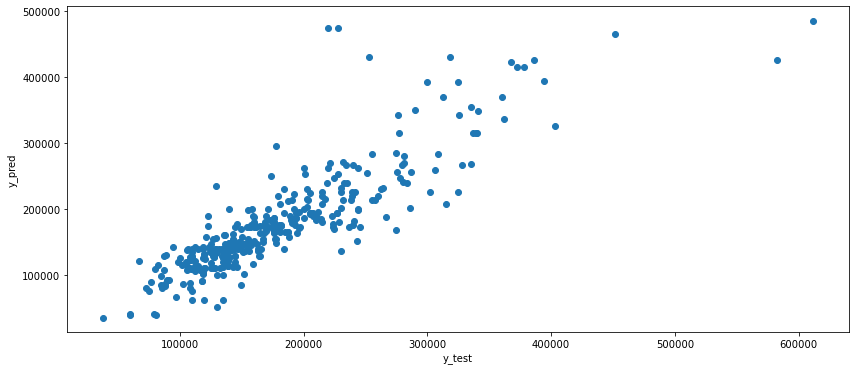

In [38]:
# # plotting original training data wth predicted values for DecisionTreeRegressor model

plt.figure(figsize=(14,6))
plt.scatter(x=y_test,y=y_pred_dt)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [39]:
# Clearly RandomForestRegressor model got 88.4% r2 score and looks good to predict Saleprice

In [40]:
# HyperParameterTuning with  RandomForestRegressor

from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state =24)

estimator = RandomForestRegressor()
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

In [41]:
grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5 ,verbose=2)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]},
             verbose=2)

In [42]:
grid.best_score_

0.8100614196731823

In [43]:
grid.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 30}

In [44]:
grid.score(X_test,y_test)

0.8789851091312281

In [45]:

grid.fit(X_train,y_train)
y_pred_rfr=grid.predict(X_test)
y_pred_rfr[0:20]

Fitting 5 folds for each of 54 candidates, totalling 270 fits


array([156452.5 , 152050.  , 406367.35,  91197.5 , 316570.  , 186645.  ,
       164575.  , 244788.  , 133805.  , 118012.5 , 232609.2 , 155440.  ,
       161275.15, 122797.5 , 298686.95, 272152.  , 136670.  , 249103.8 ,
       101052.5 ,  99637.5 ])

In [46]:
y_test[0:20]

143     140000
406     146000
383     361919
902      97000
338     341000
994     160000
964     157000
392     221000
705     140000
31      135000
1090    200000
279     128000
115     155000
41      132000
583     277500
414     238000
542     135000
322     287090
54       84900
155     119000
Name: SalePrice, dtype: int64

In [47]:
score=r2_score(y_test,y_pred_rfr)
score

0.8751063478524245

In [48]:
# HyperParameterTuning with  KNeighborsRegressor

from sklearn.model_selection import  GridSearchCV, KFold

param_grid = {'n_neighbors': np.arange(1, 12, 2),
              'weights': ['uniform', 'distance']}


knn = KNeighborsRegressor(metric='euclidean')
gscv = GridSearchCV(knn, param_grid, cv=KFold(n_splits=3,
                                              shuffle=True, random_state=0))
gscv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=KNeighborsRegressor(metric='euclidean'),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11]),
                         'weights': ['uniform', 'distance']})

In [49]:
gscv.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

In [50]:

print("Best score", gscv.best_score_)

Best score 0.5938074083872137


In [51]:
gscv.score(X_test,y_test)

0.7074471231779311

In [52]:
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(X_train,y_train)
y_pred_knr=knr.predict(X_test)
score=r2_score(y_test,y_pred_knr)
score

0.6025133655011052

In [53]:
# Clearly after hyperparameter tuning, RandomForestRegressor performs better than KNeighborsRegressor

In [54]:
# Exporting the model through pickle

import pickle
filename='HousingSalePricePred.pkl'
pickle.dump(grid,open(filename,'wb'))

In [55]:
# Conclusion 

# Clearly we can see that the actual value and predicted values are very close to each other,Hence RandomForestRegressor is
# a good choice for predicting Housing Sale price

In [56]:
# Appying RandomForestRegressor grid model after hyperparameter tuning on test data

# Importing test data

In [57]:

df_test=pd.read_csv(r'C:\ProgramData\test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [58]:
df_test.shape


(292, 80)

In [59]:

# Exploratory Data Analysis

df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [60]:
# Statistical summary
df_test.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold
count,292.000000,292.000000,247.000000,292.000000,292.000000,292.000000,292.000000,292.000000,291.000000,292.000000,...,292.000000,292.000000,292.000000,292.000000,292.000000,292.0,0.0,292.000000,292.000000,292.000000
mean,755.955479,57.414384,66.425101,10645.143836,6.078767,5.493151,1972.616438,1985.294521,109.171821,439.294521,...,86.397260,47.061644,17.708904,2.489726,15.099315,0.0,NaN,28.184932,6.232877,2007.859589
std,442.565228,43.780649,21.726343,13330.669795,1.356147,1.063267,30.447016,20.105792,175.030021,429.559675,...,121.898836,65.865449,51.892906,30.247488,58.483473,0.0,NaN,224.036218,2.774556,1.322867
min,6.000000,20.000000,21.000000,1526.000000,3.000000,3.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,1.000000,2006.000000
25%,377.750000,20.000000,53.500000,7200.000000,5.000000,5.000000,1954.000000,1968.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,4.000000,2007.000000
50%,778.000000,50.000000,65.000000,9200.000000,6.000000,5.000000,1976.000000,1994.000000,0.000000,369.500000,...,0.000000,28.500000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,6.000000,2008.000000
75%,1152.250000,70.000000,79.000000,11658.750000,7.000000,6.000000,2001.000000,2003.250000,180.000000,700.500000,...,149.250000,66.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,8.000000,2009.000000
max,1456.000000,190.000000,150.000000,215245.000000,10.000000,9.000000,2009.000000,2010.000000,1031.000000,1767.000000,...,728.000000,418.000000,330.000000,407.000000,396.000000,0.0,NaN,3500.000000,12.000000,2010.000000


In [61]:
# checking for null values in dataset

df_test.isnull().sum()


Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

In [62]:


# Filling null values for categorical features with mode and numerical features with mean

df_test['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0], inplace=True)
df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean(), inplace=True)
df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mode()[0], inplace=True)
df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0], inplace=True)

df_test['BsmtCond'].fillna(df_test['BsmtCond'].mode()[0], inplace=True)

df_test['BsmtExposure'].fillna(df_test['BsmtExposure'].mode()[0], inplace=True)

df_test['BsmtFinType1'].fillna(df_test['BsmtFinType1'].mode()[0], inplace=True)

df_test['BsmtFinType2'].fillna(df_test['BsmtFinType2'].mode()[0], inplace=True)

df_test['FireplaceQu'].fillna(df_test['FireplaceQu'].mode()[0], inplace=True)

df_test['GarageType'].fillna(df_test['GarageType'].mode()[0], inplace=True)
df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].mean(), inplace=True)
df_test['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0], inplace=True)

df_test['GarageQual'].fillna(df_test['GarageQual'].mode()[0], inplace=True)
df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0], inplace=True)

df_test['Fence'].fillna(df_test['Fence'].mode()[0], inplace=True)


In [63]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    292 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [64]:
# Now we can drop features like PoolQC,MiscFeature,Alley as values are very less for them

df_test.drop(['PoolQC','MiscFeature','Alley'],axis=1,inplace=True)

In [65]:
# converting categorical features into ordinal

df_cat_test = df_test.select_dtypes(include=['object'])

le= LabelEncoder()
for i in df_cat_test:   
    df_test[i] = le.fit_transform(df_test[i]) 



In [66]:

# Scaling the dataset and normalizing feature variables

from sklearn.preprocessing import StandardScaler 

scale = StandardScaler()
X_test= scale.fit_transform(df_test)


In [67]:
# Applying PCA for dimensionality reduction

from sklearn.decomposition import PCA

pca = PCA(n_components=25)
X_test = pd.DataFrame(pca.fit_transform(X_test))

In [68]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,6.238614,2.596336,1.090114,-1.792995,0.782832,0.354295,0.808902,-0.515669,0.050498,-0.515849,...,0.452518,-0.241847,-0.594314,-0.040099,-0.515557,-1.966712,0.321482,-0.156586,0.655083,-0.831415
1,0.947708,3.427200,-1.559120,1.925032,1.391296,5.826978,-0.028091,0.853455,2.513158,-1.404477,...,0.386787,0.898728,-2.288519,-0.017660,-1.512001,-1.273418,-1.909496,-0.779355,0.399108,1.934690
2,4.086760,-0.038333,0.156822,-3.426172,-0.006015,0.373996,-1.053725,-0.068643,-0.050526,0.265806,...,0.458669,-0.037140,-0.257514,-0.289741,1.509338,0.697688,-0.222235,-0.545729,-1.294103,0.619904
3,-2.058310,-1.686441,1.186658,0.005038,-0.481150,-0.960925,0.758156,-0.605413,0.726994,-1.126412,...,-1.333665,-1.720618,-0.160416,1.486769,-0.439879,-0.341635,0.380299,-0.701406,-0.080503,1.328184
4,3.484693,-3.098547,-0.089632,-0.985857,-0.483996,-0.194728,-0.291055,-0.103053,0.561219,-1.379779,...,-0.445511,0.523300,-0.565603,-0.005308,-0.004215,-0.144168,0.451277,0.037618,-0.027099,-1.150184


In [69]:
# Applying RandomForestRegressor model after Hyperparameter tuning on test data to get Sale price


y_pred_rfr_test = grid.predict(X_test)


In [70]:
print("Final sale price of test data : ",y_pred_rfr_test)

Final sale price of test data :  [518054.3  266368.05 469493.1  107170.   402482.7   90997.7  114262.5
 498317.2  456740.55 273833.35  73270.   113190.    77940.   551323.5
 513783.2  100803.75  94115.6  111995.   262630.1  212489.75  97287.15
 138423.   108917.5   61399.65  97258.8  100135.4  232592.4  117432.05
 171920.    98346.65  96570.2  397023.35 456883.7  175291.85 104795.
 203533.5  293603.85  91467.7  101102.15  99832.7  102525.   394220.
 448508.3  399218.4  131555.55 100029.15 105012.5   78105.   479160.05
 516651.9  110504.15 546048.65  73655.55  96900.   411393.2   88990.
 100435.4  406350.6   64460.2  477498.25  87103.25 255109.75 109290.
 205923.4  510036.15  90592.5  188977.1  385228.85 113484.6  135186.95
 405085.85 131642.5  102034.15 119545.9  124300.   391714.45 412449.5
 374328.6  457636.9  135150.   489623.85 105990.   173245.   163127.5
 248366.25 563399.95 102171.3  460203.85 114372.9  269340.   452377.8
  94032.5   94154.15  96797.7  257646.75 236743.95 466230